# Publishing and Consuming OGC Services

## Introduction

The Open Geospatial Consortium (OGC) is an international voluntary consensus standards organization. The mission of the OGC is to develop, approve, and maintain standards for making your maps and related geographic data available and shareable over the web. Using OGC services and encodings enables open access to geographic data and software functionality, allowing organizations to incorporate their GIS data and services into any app on a variety of computing and mobile devices. These open services and encodings help improve the sharing and interoperability of geospatial information.

This sample demonstrates how to create and publish simple examples of OGC WMTS, WMS, and WFS using the Python API. If you are interested in learning more about the specification to author and publish complex and more illustrative maps, refer to this <a href="https://doc.arcgis.com/en/arcgis-online/reference/ogc.htm">documentation</a>.

## Connect to your GIS

In [1]:
from arcgis.gis import GIS
from arcgis.mapping.layers import WMTSLayer, WMSLayer
from arcgis.map import Map

gis = GIS("home")

## Publishing and consuming a WMTS layer and service

OGC Web Map Tile Service (WMTS) is a set of cached image tiles that follows the WMTS specification of OGC. You can do the following with OGC WMTS layers in ArcGIS API for Python:

 - publish to your organization along with the hosted tile layer, and share with the public.
 - add them to map widget for display.
 - access them as items in ArcGIS Online organization or enterprise.

### WMTS Layer

First, let's create a `WMTSLayer`, add it to map widget for display, and save as a WebMap to preserve the map.

In [3]:
wmts_url = "https://wayback.maptiles.arcgis.com/arcgis/rest/services/world_imagery/wmts"

In [16]:
wmts_lyr = WMTSLayer(url=wmts_url)
type(wmts_lyr)

arcgis.mapping.ogc.wmts.WMTSLayer

If we query the `properties` of a `WMTSLayer`, metadata of all layers included in this `WMTSLayer` can show as:

In [31]:
wmts_lyr.properties["Capabilities"]["Contents"]["Layer"][0]

{'Title': 'World Imagery (Wayback 2022-12-14)',
 'Identifier': 'WB_2022_R15',
 'BoundingBox': {'LowerCorner': '-2.003750722959434E7 -2.003750722959434E7',
  'UpperCorner': '2.003750722959434E7 2.003750722959434E7',
  '@crs': 'urn:ogc:def:crs:EPSG::3857'},
 'WGS84BoundingBox': {'LowerCorner': '-179.99999000000003 -85.051129',
  'UpperCorner': '179.99999000000003 85.051129',
  '@crs': 'urn:ogc:def:crs:OGC:2:84'},
 'Style': {'Title': 'Default', 'Identifier': 'default', '@isDefault': 'true'},
 'Format': 'image/jpeg',
 'TileMatrixSetLink': [{'TileMatrixSet': 'default028mm'},
  {'TileMatrixSet': 'GoogleMapsCompatible'}],
 'ResourceURL': {'@format': 'image/jpeg',
  '@resourceType': 'tile',
  '@template': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/{TileMatrixSet}/MapServer/tile/45134/{TileMatrix}/{TileRow}/{TileCol}'}}

Also, we can then search for how many Imagery Layers created in year 2022 are provided:

In [29]:
for lyr in wmts_lyr.properties["Capabilities"]["Contents"]["Layer"]:
    if "2022" in lyr['Title']:
        print(lyr['Title'])

World Imagery (Wayback 2022-12-14)
World Imagery (Wayback 2022-11-02)
World Imagery (Wayback 2022-10-12)
World Imagery (Wayback 2022-09-21)
World Imagery (Wayback 2022-08-31)
World Imagery (Wayback 2022-08-10)
World Imagery (Wayback 2022-07-20)
World Imagery (Wayback 2022-06-29)
World Imagery (Wayback 2022-06-08)
World Imagery (Wayback 2022-05-18)
World Imagery (Wayback 2022-04-27)
World Imagery (Wayback 2022-04-06)
World Imagery (Wayback 2022-03-16)
World Imagery (Wayback 2022-02-24)
World Imagery (Wayback 2022-02-02)
World Imagery (Wayback 2022-01-12)



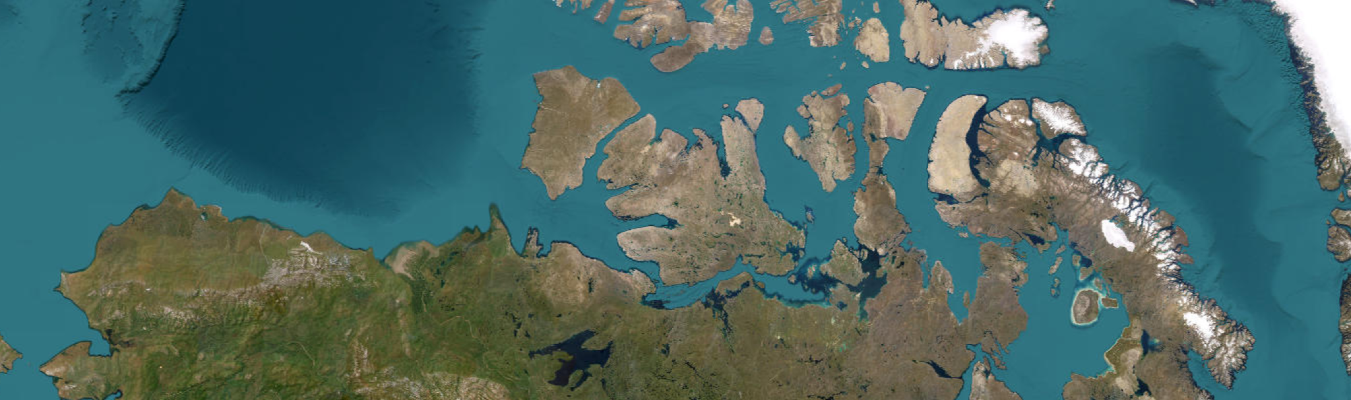

In [21]:
m = gis.map()
m.content.add(wmts_lyr)
m

In [40]:
webmap_properties = {'title':'World Image Wayback 2022-12-16 16:33pm',
                     'snippet': 'Jupyter notebook widget saved as a web map',
                     'tags':['automation', 'python']}

webmap_item = m.save(webmap_properties)
print(webmap_item.title)

World Image Wayback 2022-12-16 16:33pm


The ``get_data`` method retrieves the data associated with the Web Map item, and we can see it contains `operationalLayers` and `baseMap`.

In [39]:
webmap_item.get_data()

{'operationalLayers': [{'title': 'WMTS Layer',
   'opacity': 1,
   'visibility': True,
   'id': '8794520635386',
   'layerDefinition': {'definitionExpression': None},
   'layerType': 'WebTiledLayer',
   'templateUrl': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/default028mm/MapServer/tile/45134/{level}/{row}/{col}',
   'copyright': '',
   'fullExtent': {'xmin': -20037507.22959434,
    'ymin': -20037507.22959434,
    'xmax': 20037507.22959434,
    'ymax': 20037507.22959434,
    'spatialReference': {'wkid': 3857}},
   'tileInfo': {'rows': 256,
    'cols': 256,
    'dpi': 96,
    'origin': {'x': 0, 'y': 0, 'spatialReference': {'wkid': 3857}},
    'spatialReference': {'wkid': 3857},
    'lods': [{'level': 0,
      'levelValue': '0',
      'resolution': 156543.03392798043,
      'scale': 528299460.80074185},
     {'level': 1,
      'levelValue': '1',
      'resolution': 78271.51696399009,
      'scale': 264149730.40037048},
     {'level': 2,
      'lev

We'll delete this web map since it's for illustration:

In [ ]:
webmap_item.delete(permanent=True)

True

### WMTS Service

`WMTS` Service can be considered as the foundation of the `WMTS` Layer. We can create the WMTS service by `gis.content.add` method, which adds the content (mostly the URL to an ArcGIS Server Service, WMTS, or WMS service) to the GIS and creates an `arcgis.gis.Item`:

In [41]:
import json
root_folder = gis.content.folders.get()
dictItemData =  {
        'title': 'World Imagery (Wayback)', 
        'tags': ['imagery', 'wayback', 'esri_imagery', 'community basemap', 'world', 'community', 'satellite', 'orthophotos', 'baseimagery', 'general availability', 'esri_basemap', 'aerial'], 
        'accessInformation': 'Esri, Maxar, Earthstar Geographics, and the GIS User Community', 'description': "<p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>Wayback is a digital archive, providing users with access to the different versions of\xa0<a href='https://www.arcgis.com/home/item.html?id=10df2279f9684e4a9f6a7f08febac2a9' target='_blank'>World Imagery</a>\xa0created over time. Each layer in the archive represents a snapshot of the entire World Imagery map, as it existed on the date it was published. This Wayback layer is the Dec 13, 2022 version of World Imagery. See @Wb_Metadata_Item for detailed information about each image source in this layer.</p><p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>World Imagery provides one meter or better satellite and aerial imagery for much of the world, and lower resolution satellite imagery worldwide. As World Imagery is updated with more current imagery, new versions of the map are published. When and where updates occur, the previous imagery is replaced and is no longer visible. For many use cases, the new imagery is more desirable and typically preferred. Other times, however, the previous imagery may support use cases that the new imagery does not. In these cases, a user may need to access a previous version of World Imagery.</p><p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>Wayback currently provides access to all published versions of World Imagery, dating back to February 20, 2014. There is an ArcGIS Online item for every version which can be viewed in the\xa0<a href='https://www.arcgis.com/home/group.html?id=0f3189e1d1414edfad860b697b7d8311#overview' target='_blank'>Wayback Imagery group</a>.</p>", 
        'snippet': 'This Wayback layer is the Dec 13, 2022 version of the World Imagery map.', 'url': wmts_url, 
        'licenseInfo': "<img alt='' src='https://downloads.esri.com/blogs/arcgisonline/esrilogo_new.png' /> This work is licensed under the Esri Master License Agreement.<br /><div><a href='https://goto.arcgis.com/termsofuse/viewsummary' target='_blank'><b>View Summary</b></a> | <b><a href='https://goto.arcgis.com/termsofuse/viewtermsofuse' target='_blank'>View Terms of Use</a></b></div><div><br /></div><div><div><b>Export:</b> This layer is not intended to be used to export tiles for offline.</div><div><br /></div><div><b>Data Collection and Editing: </b>This layer may be used in various ArcGIS apps to support data collection and editing, with the results used internally or shared with others, as described for these\xa0<a href='https://www.arcgis.com/home/item.html?id=8e90a00a0a6845a49262e0b756f57a10' target='_blank'>use cases</a>.</div><div><br /></div></div>", 
        'extent': [[-179.99999000000003, -85.051129], [179.99999000000003, 85.051129]], 
        'text': json.dumps( WMTSLayer(wmts_url, gis=gis).__text__), 
        'type': 'WMTS', 
        'typeKeywords': ['Data', 'OGC', 'Service', 'Web Map Tile Service']
    }
item = root_folder.add(item_properties=dictItemData).result()

In [43]:
item.type

'WMTS'

In [6]:
item.get_data()

{'templateUrl': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/default028mm/MapServer/tile/7110/{level}/{row}/{col}',
 'copyright': '',
 'fullExtent': {'xmin': -20037507.22959434,
  'ymin': -20037507.22959434,
  'xmax': 20037507.22959434,
  'ymax': 20037507.22959434,
  'spatialReference': {'wkid': 3857}},
 'tileInfo': {'rows': 256,
  'cols': 256,
  'dpi': 96,
  'origin': {'x': 0.0, 'y': 0.0, 'spatialReference': {'wkid': 3857}},
  'spatialReference': {'wkid': 3857},
  'lods': [{'level': 0,
    'levelValue': '0',
    'resolution': 156543.03392798043,
    'scale': 528299460.80074185},
   {'level': 1,
    'levelValue': '1',
    'resolution': 78271.51696399009,
    'scale': 264149730.40037048},
   {'level': 2,
    'levelValue': '2',
    'resolution': 39135.758481995166,
    'scale': 132074865.20018566},
   {'level': 3,
    'levelValue': '3',
    'resolution': 19567.879240997456,
    'scale': 66037432.60009239},
   {'level': 4,
    'levelValue': '4',
    '

Compared to the response of `get_data` retrieved from a WMTS Layer, we can see that that of a WMTS service serves as a subset to the former.

We'll delete this:

In [ ]:
item.delete(permanent=True)

True

## Publishing and consuming a WMS service

OGC Web Map Service (WMS) is a dynamic map service that follows the WMS specification of OGC. You can do the following with OGC WMS layers in ArcGIS API for Python:

 - Add them to a web map and display.
 - Access them through ArcGIS Online or Enterprise.

### WMS Layer

Now let us create a WMS Layer and explore how to render the layer, and parse the information shipped with it.

In [68]:
wms_url = "http://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi"

In [51]:
wms_lyr = WMSLayer(url=wms_url)
type(wms_lyr)

arcgis.mapping.ogc._wms.WMSLayer

In [65]:
wms_lyr.properties["WMS_Capabilities"]['Capability']["Layer"]['Layer'][0]

{'Name': 'nexrad-n0r',
 'Title': 'NEXRAD BASE REFLECT CURRENT',
 'CRS': ['EPSG:4326', 'EPSG:26915'],
 'EX_GeographicBoundingBox': {'westBoundLongitude': '-126',
  'eastBoundLongitude': '-66',
  'southBoundLatitude': '24',
  'northBoundLatitude': '50'},
 'BoundingBox': {'@CRS': 'EPSG:4326',
  '@minx': '24',
  '@miny': '-126',
  '@maxx': '50',
  '@maxy': '-66'},
 'MetadataURL': {'Format': 'text/xml',
  'OnlineResource': {'@type': 'simple',
   '@href': 'https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi?request=GetMetadata&layer=nexrad-n0r'},
  '@type': 'TC211'},
 'MaxScaleDenominator': '4.65e+08',
 '@queryable': '0',
 '@opaque': '0',
 '@cascaded': '0'}

We can parse the `properties` with the WMS layer, and explore how many sub-layers come with it:

In [66]:
for lyr in wms_lyr.properties["WMS_Capabilities"]['Capability']["Layer"]['Layer']:
    print(lyr['Name'])

nexrad-n0r
nexrad-n0r-900913
nexrad-n0r-900913-m05m
nexrad-n0r-900913-m10m
nexrad-n0r-900913-m15m
nexrad-n0r-900913-m20m
nexrad-n0r-900913-m25m
nexrad-n0r-900913-m30m
nexrad-n0r-900913-m35m
nexrad-n0r-900913-m40m
nexrad-n0r-900913-m45m
nexrad-n0r-900913-m50m
nexrad-n0r-m05m
nexrad-n0r-m10m
nexrad-n0r-m15m
nexrad-n0r-m20m
nexrad-n0r-m25m
nexrad-n0r-m30m
nexrad-n0r-m35m
nexrad-n0r-m40m
nexrad-n0r-m45m
nexrad-n0r-m50m



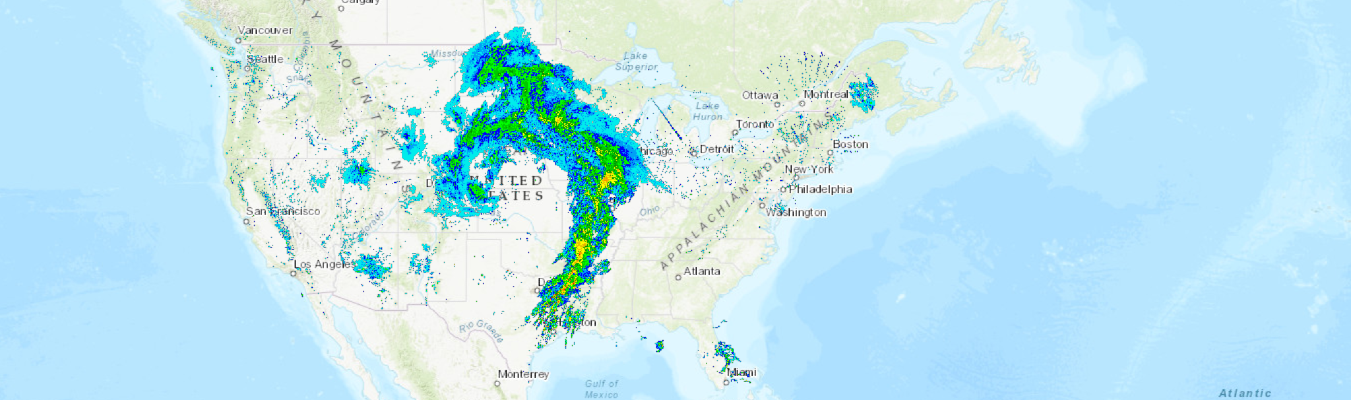

In [12]:
m1 = gis.map()
m1.content.add(wms_lyr)
m1

### WMS Service

Besides creating WMSLayer directly, we can also add the content (mostly the URL to the WMS service) to the GIS and creates an arcgis.gis.Item:

In [75]:
dictItemData =  {
        'title': 'nexrad-n0r (WMS)', 
        'tags': [], 
        'accessInformation': 'Esri, and the GIS User Community', 'description': "<p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>Test description</p>", 
        'snippet': 'Test Snippet', 'url': wms_url, 
        'licenseInfo': "<img alt='' src='https://downloads.esri.com/blogs/arcgisonline/esrilogo_new.png' /> This work is licensed under the Esri Master License Agreement.<br /><div><a href='https://goto.arcgis.com/termsofuse/viewsummary' target='_blank'><b>View Summary</b></a> | <b><a href='https://goto.arcgis.com/termsofuse/viewtermsofuse' target='_blank'>View Terms of Use</a></b></div><div><br /></div><div><div><b>Export:</b> This layer is not intended to be used to export tiles for offline.</div><div><br /></div><div><b>Data Collection and Editing: </b>This layer may be used in various ArcGIS apps to support data collection and editing, with the results used internally or shared with others, as described for these\xa0<a href='https://www.arcgis.com/home/item.html?id=8e90a00a0a6845a49262e0b756f57a10' target='_blank'>use cases</a>.</div><div><br /></div></div>", 
        'text': json.dumps( WMSLayer(wms_url, gis=gis)._lyr_json), 
        'type': 'WMS', 
        'typeKeywords': ['Data', 'OGC', 'Service', 'Web Map Service']
    }
wms_item = root_folder.add(item_properties=dictItemData).result()
wms_item.type

'WMS'

In [76]:
wms_item.get_data()

{'type': 'WMS',
 'id': '8a6133894cdb4658919a3da45d0187c4',
 'title': 'WMS Layer',
 'url': 'http://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi',
 'version': '1.3.0',
 'sublayers': [{'name': 'nexrad-n0r'},
  {'name': 'nexrad-n0r-900913'},
  {'name': 'nexrad-n0r-900913-m05m'},
  {'name': 'nexrad-n0r-900913-m10m'},
  {'name': 'nexrad-n0r-900913-m15m'},
  {'name': 'nexrad-n0r-900913-m20m'},
  {'name': 'nexrad-n0r-900913-m25m'},
  {'name': 'nexrad-n0r-900913-m30m'},
  {'name': 'nexrad-n0r-900913-m35m'},
  {'name': 'nexrad-n0r-900913-m40m'},
  {'name': 'nexrad-n0r-900913-m45m'},
  {'name': 'nexrad-n0r-900913-m50m'},
  {'name': 'nexrad-n0r-m05m'},
  {'name': 'nexrad-n0r-m10m'},
  {'name': 'nexrad-n0r-m15m'},
  {'name': 'nexrad-n0r-m20m'},
  {'name': 'nexrad-n0r-m25m'},
  {'name': 'nexrad-n0r-m30m'},
  {'name': 'nexrad-n0r-m35m'},
  {'name': 'nexrad-n0r-m40m'},
  {'name': 'nexrad-n0r-m45m'},
  {'name': 'nexrad-n0r-m50m'}],
 'minScale': 0,
 'maxScale': 0,
 'opacity': 1}

In [77]:
wms_item.delete(permanent=True)

True

## Publishing and consuming WFS

OGC Web Feature Service (WFS) is a dynamic feature service that follows the WFS specification of OGC. You can do the following with OGC WFS layers in ArcGIS API for Python:

 - Add them to widget for map display.
 - Add them as items to ArcGIS Online or Enterprise.
 - Publish one from a hosted feature layer.

### WFS Service

For example, the `West Virginia Geological and Economic Survey (WVGES)`, which investigates and reports on West Virginia's geology and disseminates information, provides `WFS` endpoints at [WFS GetCapabilities](https://atlas2.wvgs.wvnet.edu/server/services/Hosted/Reference_Quadrangles/MapServer/WFSServer?request=GetCapabilities&service=WFS). With the WFS data support, we can see a simple example below that queries the `Reference Boundaries for the State of West Virginia: 3.75' Quarter Quadrangles, 7.5' Quadrangles, 15' Quadrangles, 100k Quadrangles, 250k Quadrangles` layer to create a WFS service, and then add it to a Web Map item:

In [1]:
wfs_url = "https://atlas2.wvgs.wvnet.edu/server/services/Hosted/Reference_Quadrangles/MapServer/WFSServer?version=2.0.0&service=WFS&srsName=EPSG:3857"

Response returned by `"https://atlas2.wvgs.wvnet.edu/server/services/Hosted/Reference_Quadrangles/MapServer/WFSServer?service=wfs%26version=2.0.0%26request=DescribeFeatureType"` describes the fields contained in the element `"_50k_Quadrangles"` with data type equals to `"Reference_Quadrangles:_50k_QuadranglesFeatureType"`. We can use the elements listed in the `SimpleType` and `ComplexType` to compose the following layer definition:

In [13]:
wfs_txt = {'id': 'wfs_8708',
 'url': wfs_url,
 'visibility': True,
 'opacity': 1,
 'title': '_50k_Quadrangles',
 'layerDefinition': {'geometryType': 'esriGeometryPolygon',
  'drawingInfo': {'renderer': {'type': 'simple',
    'symbol': {'color': [227, 139, 79, 204],
     'outline': {'color': [255, 255, 255, 255],
      'width': 0.75,
      'type': 'esriSLS',
      'style': 'esriSLSSolid'},
     'type': 'esriSFS',
     'style': 'esriSFSSolid'}}},
  'spatialReference': {'wkid': 3857},
  'fields': [{'name': 'OBJECTID',
    'alias': 'OBJECTID',
    'type': 'esriFieldTypeInteger',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'db_u2giy.hsu_tsjq0.reference_quadrangles_wv_quadrangles_index_250k_wm.area',
    'alias': 'db_u2giy.hsu_tsjq0.reference_quadrangles_wv_quadrangles_index_250k_wm.area',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'PERIMETER',
    'alias': 'PERIMETER',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'Q_250K_',
    'alias': 'Q_250K_',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'Q_250K_ID',
    'alias': 'Q_250K_ID',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'USGS_QD_ID',
    'alias': 'USGS_QD_ID',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'QUAD_NAME',
    'alias': 'QUAD_NAME',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'MAP_EDIT',
    'alias': 'MAP_EDIT',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'ST_FIPS1',
    'alias': 'ST_FIPS1',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'ST_NAME1',
    'alias': 'ST_NAME1',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'ST_FIPS2',
    'alias': 'ST_FIPS2',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'ST_NAME2',
    'alias': 'ST_NAME2',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'ST_FIPS3',
    'alias': 'ST_FIPS3',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'ST_NAME3',
    'alias': 'ST_NAME3',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'ST_FIPS4',
    'alias': 'ST_FIPS4',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'ST_NAME4',
    'alias': 'ST_NAME4',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'DATE_REV',
    'alias': 'DATE_REV',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'DATE_PUB',
    'alias': 'DATE_PUB',
    'type': 'esriFieldTypeString',
    'wfsNamespace': 'unknown'},
   {'name': 'Shape',
    'alias': 'Shape',
    'type': 'esriFieldTypeGeometry',
    'wfsNamespace': 'http://www.opengis.net/gml/3.2'},
   {'name': 'st_area_shape_',
    'alias': 'st_area_shape_',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'},
   {'name': 'st_length_shape_',
    'alias': 'st_length_shape_',
    'type': 'esriFieldTypeDouble',
    'wfsNamespace': 'http://www.w3.org/2001/XMLSchema'}]},
 'type': 'WFS',
 'layerType': 'WFS',
 'mode': 0,
 'wfsInfo': {'version': '2.0.0',
  'name': '_50k_Quadrangles',
  'wfsNamespace': 'https://atlas2.wvgs.wvnet.edu/portal/services/Reference_Quadrangles/FeatureServer/WFSServer',
  'featureUrl': 'https://atlas2.wvgs.wvnet.edu:443/server/services/Hosted/Reference_Quadrangles/MapServer/WFSServer',
  'supportedSpatialReferences': [3857, 4326],
  'maxFeatures': 3000}}

Then, use the [`add()`](/python/latest/api-reference/arcgis.gis.toc.html#arcgis.gis._impl._content_manager.Folder.add) method on a [_Folder_](/python/latest/api-reference/arcgis.gis.toc.html#folder) object to add content to the GIS by creating an `WFS` service. The _item_properties_ argument can be an [ItemProperties](/python/api-reference/arcgis.gis.toc.html#arcgis.gis._impl._dataclasses.ItemProperties) object or a dictionary you create. 
See the [Items and item types](/rest/users-groups-and-items/items-and-item-types/) rest documentation for detailed description on various items, and the [addItem](/rest/users-groups-and-items/add-item/#request-parameters) documentation for detailed descriptions of the properties.

In [14]:
import json
from arcgis.gis import GIS
gis = GIS('home')
dictItemData =  {
        'title': 'WVGS Atlas (WFS)', 
        'tags': ['wfs'], 
        'accessInformation': 'Esri, and the GIS User Community', 'description': "Test description", 
        'snippet': 'Test snippet', 
        'licenseInfo': "<img alt='' src='https://downloads.esri.com/blogs/arcgisonline/esrilogo_new.png' /> This work is licensed under the Esri Master License Agreement.<br /><div><a href='https://goto.arcgis.com/termsofuse/viewsummary' target='_blank'><b>View Summary</b></a> | <b><a href='https://goto.arcgis.com/termsofuse/viewtermsofuse' target='_blank'>View Terms of Use</a></b></div><div><br /></div><div><div><b>Export:</b> This layer is not intended to be used to export tiles for offline.</div><div><br /></div><div><b>Data Collection and Editing: </b>This layer may be used in various ArcGIS apps to support data collection and editing, with the results used internally or shared with others, as described for these\xa0<a href='https://www.arcgis.com/home/item.html?id=8e90a00a0a6845a49262e0b756f57a10' target='_blank'>use cases</a>.</div><div><br /></div></div>", 
        'text': json.dumps(wfs_txt),
        'type': 'WFS', 
        'typeKeywords': ['Data', 'OGC', 'Service', 'Web Feature Service']
    }

root_folder = gis.content.folders.get()
wfs_item = root_folder.add(item_properties=dictItemData).result()
wfs_item.type    

'WFS'

In [16]:
wfs_item.get_data()['layerType']

'WFS'

Besides creating a stand-alone WFS service, we can also add the WFS to a Web Map, then use the `print` service to have the Web Map printed out in desired format:

In [17]:
wm2 = {"operationalLayers":[wfs_txt],
       'baseMap': { 'baseMapLayers': [{'id': 'World_Hillshade_3805',
                    'layerType': 'ArcGISTiledMapServiceLayer',
                    'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer',
                    'visibility': True,
                    'opacity': 1,
                    'title': 'World Hillshade'},
                    {'id': 'VectorTile_2333',
                    'type': 'VectorTileLayer',
                    'layerType': 'VectorTileLayer',
                    'title': 'World Topographic Map',
                    'styleUrl': 'https://cdn.arcgis.com/sharing/rest/content/items/7dc6cea0b1764a1f9af2e679f642f0f5/resources/styles/root.json',
                    'visibility': True,
                    'opacity': 1}],
                    'title': 'Topographic'},
       'spatialReference': {'wkid': 102100, 'latestWkid': 3857},
       'authoringApp': 'WebMapViewer',
       'authoringAppVersion': '10.3',
       'version': '2.26'}

In [18]:
wfs_item = root_folder.add(
                item_properties={
                    "title": "Sample WFS Map",
                    "type": "Web Map",
                    "tags": "erase, me",
                    "text": json.dumps(wm2),
                }
           ).result()

Now, let's print the WebMap object containing the WFS service as below. Once the print job is triggered, user will be directed to `printed_file_url` (e.g. `https://<your org>.arcgis.com/home/webmap/print.html`) to download the file. Note that, for OGC WFS layers, the coordinate system of the basemap must be supported by the WFS service or the layer may not be drawn successfully. Map Viewer or Map Viewer Classic will not switch to use a compatible basemap. If the basemap is not compatible with the WFS layer, Map Viewer or Map Viewer Classic will display a message to that effect. In this case, we have used a WFS that supports `EPSG:3857`.

In [30]:
wm_obj2 = Map(item=wfs_item)
printed_file_url = wm_obj2.print(file_format='JPG', 
                                 extent={"xmin":-10909090.288200358,"ymin":2331023.6145840986,"xmax":-6203015.330739876,"ymax":6401142.496712082,"spatialReference":{"wkid":102100,"latestWkid":3857}})


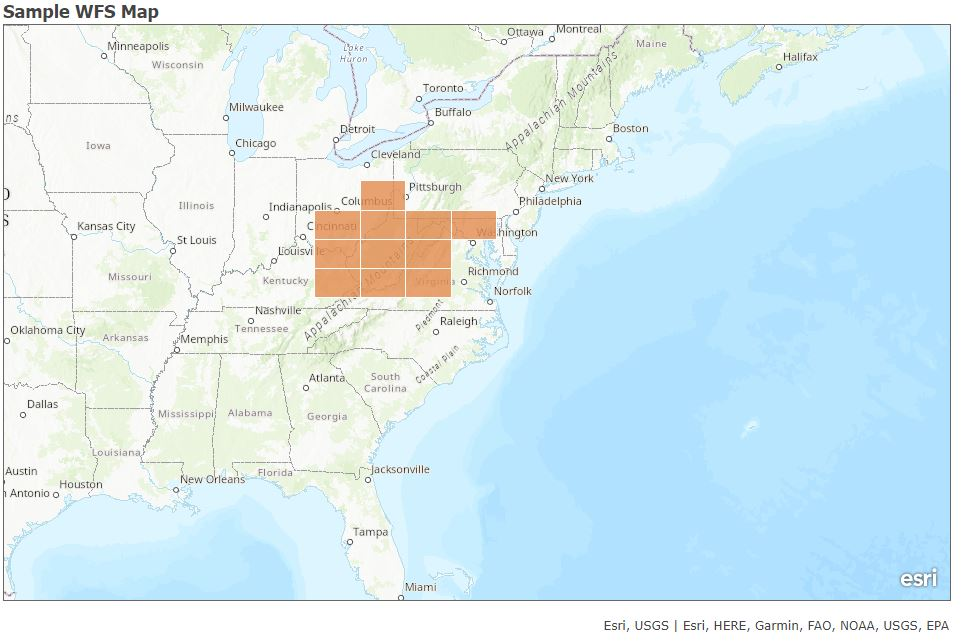

In [29]:
from IPython.display import Image
Image(printed_file_url)

This sample has walked users through the publishing and consuming process of OGC WMTS, WMS and WFS services, with ArcGIS API for Python. If interested in learning more about OGC and its limitations of rendering withint the widget, please refer to the <a href="https://doc.arcgis.com/en/arcgis-online/reference/ogc.htm">ArcGISOnline help doc</a>.